# Traffic Sign Recognition Using Deep Learning
One of the applications where deep learning is being used extensively is Autonomous Driving. The autonous driving mechanism needs to detect innumerable objects (pedestrians, other cars, obstacles etc) and make decisions. One of the smaller problems is to detect traffic signs and make decisions accordingly. We are going to solve problems of detecting traffic signs on the road. 





## Exploring dataset

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from skimage import color, exposure, transform, io
import tqdm
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection  import train_test_split
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import data, color
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import warnings
warnings.filterwarnings('ignore')

In [2]:
NUM_CLASSES = 58
IMG_SIZE = 43
TRAINING_PATH = 'traffic_Data\DATA\\'
TEST_PATH = 'traffic_Data\TEST\\'

BATCH_SIZE = 32
EPOCHS = 30

In windows, glob might give us mixed separators which will create problem when we extract the class information from image paths, therefore, creating the below functions to fix the image paths.

In [3]:
print('Reading Filepaths of each images: ')
for file in os.listdir(TRAINING_PATH):
    print(f"{file}", end = ',')
    globals() [f"folder_{file}"] = glob.glob(TRAINING_PATH+f'/{file}/*.png')

Reading Filepaths of each images: 
0,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,

In [4]:
df = pd.read_csv('labels.csv')

In [5]:
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [6]:
label_names = dict(enumerate(os.listdir(TRAINING_PATH)))

In [7]:
label_names = dict([(int(j),i)for (i,j) in label_names.items()])

In [8]:
label_names

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57}

In [9]:
df['ClassId'] = df['ClassId'].map(label_names)

In [10]:
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [11]:
df.set_index('ClassId', inplace = True)

In [26]:
df

,Name
ClassId,
0,Speed limit (5km/h)
1,Speed limit (15km/h)
2,Speed limit (30km/h)
3,Speed limit (40km/h)
4,Speed limit (50km/h)
5,Speed limit (60km/h)
6,Speed limit (70km/h)
7,speed limit (80km/h)
8,Dont Go straight or left


In [12]:
image = []
label = []

count = 0
for folder in tqdm.tqdm(os.listdir(TRAINING_PATH)):
    print(f"Folder {folder} images reading....", end = '')
    for i in eval(f"folder_{folder}"):
        img = plt.imread(i)
        image.append(img)
        label.append(count)
    count += 1

  0%|                                                                                           | 0/58 [00:00<?, ?it/s]

Folder 0 images reading....

  2%|█▍                                                                                 | 1/58 [00:00<00:56,  1.01it/s]

Folder 01 images reading....

  3%|██▊                                                                                | 2/58 [00:01<00:33,  1.69it/s]

Folder 02 images reading....

  5%|████▎                                                                              | 3/58 [00:02<00:35,  1.54it/s]

Folder 03 images reading....

  7%|█████▋                                                                             | 4/58 [00:04<01:11,  1.32s/it]

Folder 04 images reading....

  9%|███████▏                                                                           | 5/58 [00:05<01:01,  1.15s/it]

Folder 05 images reading....

 10%|████████▌                                                                          | 6/58 [00:06<01:09,  1.35s/it]

Folder 06 images reading....

 12%|██████████                                                                         | 7/58 [00:07<00:57,  1.13s/it]

Folder 07 images reading....

 14%|███████████▍                                                                       | 8/58 [00:08<01:00,  1.20s/it]

Folder 08 images reading....Folder 09 images reading....Folder 10 images reading....

 19%|███████████████▌                                                                  | 11/58 [00:09<00:29,  1.59it/s]

Folder 11 images reading....

 21%|████████████████▉                                                                 | 12/58 [00:10<00:33,  1.36it/s]

Folder 12 images reading....

 22%|██████████████████▍                                                               | 13/58 [00:11<00:36,  1.25it/s]

Folder 13 images reading....

 24%|███████████████████▊                                                              | 14/58 [00:12<00:30,  1.45it/s]

Folder 14 images reading....

 28%|██████████████████████▌                                                           | 16/58 [00:13<00:27,  1.52it/s]

Folder 15 images reading....Folder 16 images reading....

 29%|████████████████████████                                                          | 17/58 [00:14<00:34,  1.18it/s]

Folder 17 images reading....

 34%|████████████████████████████▎                                                     | 20/58 [00:16<00:22,  1.68it/s]

Folder 18 images reading....Folder 19 images reading....Folder 20 images reading....

 38%|███████████████████████████████                                                   | 22/58 [00:16<00:14,  2.45it/s]

Folder 21 images reading....Folder 22 images reading....

 41%|█████████████████████████████████▉                                                | 24/58 [00:17<00:10,  3.23it/s]

Folder 23 images reading....Folder 24 images reading....

 43%|███████████████████████████████████▎                                              | 25/58 [00:18<00:17,  1.87it/s]

Folder 25 images reading....Folder 26 images reading....

 47%|██████████████████████████████████████▏                                           | 27/58 [00:19<00:17,  1.80it/s]

Folder 27 images reading....

 48%|███████████████████████████████████████▌                                          | 28/58 [00:19<00:14,  2.09it/s]

Folder 28 images reading....

 50%|█████████████████████████████████████████                                         | 29/58 [00:23<00:41,  1.44s/it]

Folder 29 images reading....

 52%|██████████████████████████████████████████▍                                       | 30/58 [00:24<00:32,  1.16s/it]

Folder 30 images reading....

 53%|███████████████████████████████████████████▊                                      | 31/58 [00:25<00:33,  1.24s/it]

Folder 31 images reading....

 57%|██████████████████████████████████████████████▋                                   | 33/58 [00:26<00:18,  1.33it/s]

Folder 32 images reading....Folder 33 images reading....Folder 34 images reading....

 60%|█████████████████████████████████████████████████▍                                | 35/58 [00:26<00:11,  2.06it/s]

Folder 35 images reading....

 62%|██████████████████████████████████████████████████▉                               | 36/58 [00:28<00:16,  1.37it/s]

Folder 36 images reading....

 64%|████████████████████████████████████████████████████▎                             | 37/58 [00:28<00:13,  1.58it/s]

Folder 37 images reading....

 66%|█████████████████████████████████████████████████████▋                            | 38/58 [00:29<00:12,  1.63it/s]

Folder 38 images reading....

 67%|███████████████████████████████████████████████████████▏                          | 39/58 [00:29<00:09,  1.92it/s]

Folder 39 images reading....

 69%|████████████████████████████████████████████████████████▌                         | 40/58 [00:29<00:08,  2.17it/s]

Folder 40 images reading....

 72%|███████████████████████████████████████████████████████████▍                      | 42/58 [00:30<00:05,  2.96it/s]

Folder 41 images reading....Folder 42 images reading....

 74%|████████████████████████████████████████████████████████████▊                     | 43/58 [00:30<00:04,  3.09it/s]

Folder 43 images reading....

 76%|██████████████████████████████████████████████████████████████▏                   | 44/58 [00:31<00:06,  2.18it/s]

Folder 44 images reading....

 78%|███████████████████████████████████████████████████████████████▌                  | 45/58 [00:31<00:05,  2.49it/s]

Folder 45 images reading....

 81%|██████████████████████████████████████████████████████████████████▍               | 47/58 [00:31<00:03,  3.49it/s]

Folder 46 images reading....Folder 47 images reading....

 83%|███████████████████████████████████████████████████████████████████▊              | 48/58 [00:31<00:02,  4.32it/s]

Folder 48 images reading....Folder 49 images reading....

 86%|██████████████████████████████████████████████████████████████████████▋           | 50/58 [00:32<00:01,  4.40it/s]

Folder 50 images reading....

 88%|████████████████████████████████████████████████████████████████████████          | 51/58 [00:33<00:02,  2.89it/s]

Folder 51 images reading....Folder 52 images reading....

 91%|██████████████████████████████████████████████████████████████████████████▉       | 53/58 [00:33<00:01,  3.52it/s]

Folder 53 images reading....Folder 54 images reading....

 95%|█████████████████████████████████████████████████████████████████████████████▊    | 55/58 [00:36<00:01,  1.52it/s]

Folder 55 images reading....

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 56/58 [00:37<00:01,  1.23it/s]

Folder 56 images reading....

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:38<00:00,  1.51it/s]

Folder 57 images reading....

## Preprocessing images 

Now, we will use preprocess our images. We need preprocessing for two reasons:
- To normalize intensity across all images i.e if an image is overexposed or underexposed, we will make it well-exposed using [histogram equilization](https://en.wikipedia.org/wiki/Histogram_equalization). As you can see in above pictures, we have many such images.
- To resize all images to same size.

In [13]:
def preprocess_images(img):
    # return image in HSV format
    hsv = color.rgb2hsv(img)
    # return image after histogram equilization
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)
    
    # resizing image to fixed dimension
    min_side = min(img.shape[:-1])
    center =img.shape[0] // 2, img.shape[1] // 2
    img = img[center[0] - min_side // 2: center[0] + min_side // 2,
              center[1] - min_side // 2: center[0] + min_side // 2,
              :]
    img = transform.resize(img,(IMG_SIZE, IMG_SIZE), mode = 'constant')

    return img

In [14]:
X = []

for i in tqdm.tqdm(image):
    X.append(preprocess_images(i))

100%|██████████████████████████████████████████████████████████████████████████████| 4170/4170 [00:56<00:00, 74.44it/s]


Below are the images after preprocessing step

In [15]:
X,y = shuffle(X,label)

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
y

array([48,  0, 28, ..., 28, 28, 54])

In [18]:
X

array([[[[0.7624844 , 0.79940873, 0.8099965 ],
         [0.8397407 , 0.87954915, 0.89185995],
         [0.8427063 , 0.87954867, 0.8928184 ],
         ...,
         [0.84591335, 0.881625  , 0.8954632 ],
         [0.84034157, 0.8766312 , 0.8885709 ],
         [0.7529265 , 0.78555346, 0.79465175]],

        [[0.82918924, 0.87262803, 0.8828515 ],
         [0.9125871 , 0.95537996, 0.9686374 ],
         [0.91729397, 0.9617475 , 0.97369283],
         ...,
         [0.9227843 , 0.96446586, 0.9784357 ],
         [0.9159693 , 0.95598483, 0.9680895 ],
         [0.8264519 , 0.8632517 , 0.8738861 ]],

        [[0.77602226, 0.82470566, 0.8667775 ],
         [0.86358184, 0.9108575 , 0.9542516 ],
         [0.863513  , 0.9174268 , 0.954871  ],
         ...,
         [0.8179346 , 0.86609966, 0.9321049 ],
         [0.82183015, 0.86308616, 0.93016934],
         [0.7456724 , 0.7871791 , 0.84390897]],

        ...,

        [[0.32146898, 0.297967  , 0.49304765],
         [0.2976576 , 0.27803886, 0.4526322 ]

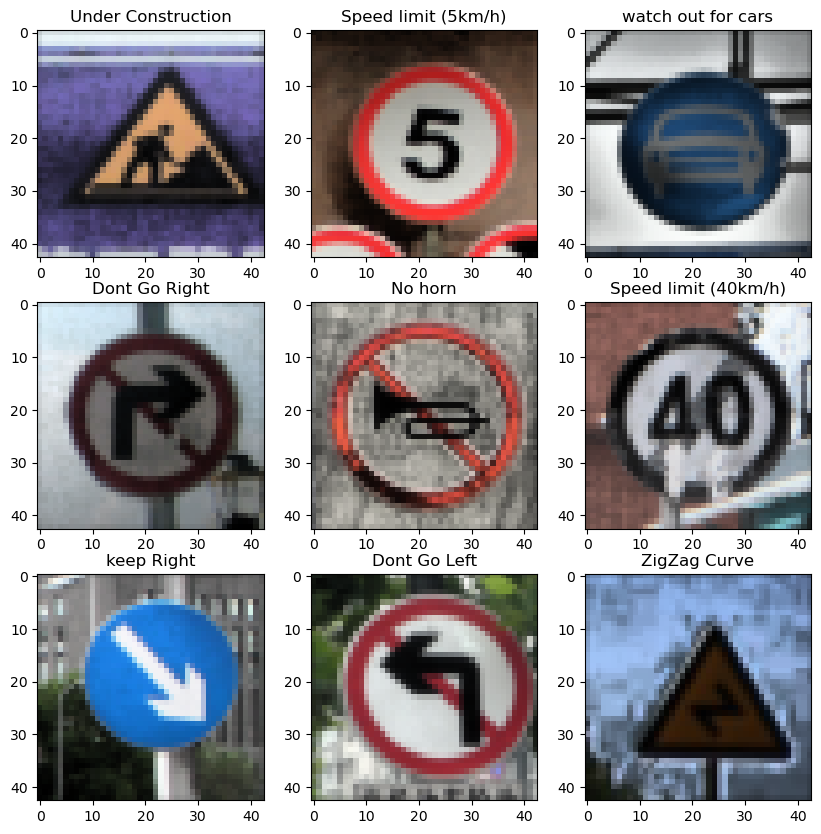

In [19]:
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X[i], cmap=plt.get_cmap('gray'))
    plt.title(df.loc[y[i]]['Name'])
#Show the plot
plt.show()

In [20]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

## Building Convolutional Neural Network Model
We will now build our sequential CNN model with following specifications:
- 6 convolutional layer followed by one hidden layer and one output layer(fully
    connected or dense layer). 
- Dropout layers for regularization to avoid overfitting
- Relu activation function for all convolutional layers
- Softmax activation function for output layer as it is a multi-class classification problem
- Flatten layer for reshaping the output of the convolutional layer

In [21]:
from keras.models import Sequential
from keras.layers.core import Dropout, Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD

In [22]:
def build_cnn_model():
    model = Sequential() 
    model.add(Conv2D(32, (3, 3), padding ='same', input_shape = (IMG_SIZE, IMG_SIZE, 3), activation = 'relu'))
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), padding ='same', activation = 'relu'))
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation = 'softmax'))
    return model

Lets us now compile our model using loss function as categorical_crossentropy

In [23]:
model = build_cnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

We will be using callback feature of keras which are a set of functions like 'LearningRateScheduler', 'ModelCheckpoint' and 'EarlyStopping'.
- Learning rate scheduler will decay learning rate. Slowing learning rate over epochs might help learn model better.
- Model checkpoint will save the model with the best validation accuracy as we progress. This will help in case when our model    starts overfitting. 
- Early Stopping will stop the training if the accuracy gain between 'patience' epochs is not more than a specified value.

## Training the built model
Training the model might take long time using CPU. Because of the parallel nature of the neural networks, they work extremely well with GPUs(NVIDIA GPUs with CUDA).
I used NVIDIA Tesla K80 which significantly decreased the training time by many folds.

In [24]:
import h5py as h5py

In [27]:
y_train.shape

(3336,)

In [28]:
model_history = model.fit(X_train, y_train,
                          epochs = EPOCHS,
                          validation_split = 0.2)

Epoch 1/30
84/84 [==============================] - 18s 199ms/step - loss: 3.5708 - accuracy: 0.1151 - val_loss: 2.8779 - val_accuracy: 0.2275
Epoch 2/30
84/84 [==============================] - 15s 184ms/step - loss: 2.5965 - accuracy: 0.3036 - val_loss: 1.7570 - val_accuracy: 0.5719
Epoch 3/30
84/84 [==============================] - 15s 182ms/step - loss: 1.4415 - accuracy: 0.6046 - val_loss: 0.8763 - val_accuracy: 0.7455
Epoch 4/30
84/84 [==============================] - 20s 238ms/step - loss: 0.7680 - accuracy: 0.7852 - val_loss: 0.5155 - val_accuracy: 0.8563
Epoch 5/30
84/84 [==============================] - 17s 203ms/step - loss: 0.5084 - accuracy: 0.8478 - val_loss: 0.4924 - val_accuracy: 0.8638
Epoch 6/30
84/84 [==============================] - 18s 215ms/step - loss: 0.3345 - accuracy: 0.9074 - val_loss: 0.2242 - val_accuracy: 0.9431
Epoch 7/30
84/84 [==============================] - 15s 179ms/step - loss: 0.2569 - accuracy: 0.9288 - val_loss: 0.1589 - val_accuracy: 0.9596

## Plotting Accuracy and Loss Curves

Summarize history for Accuracy

In [29]:
model.save("my_model.h5")

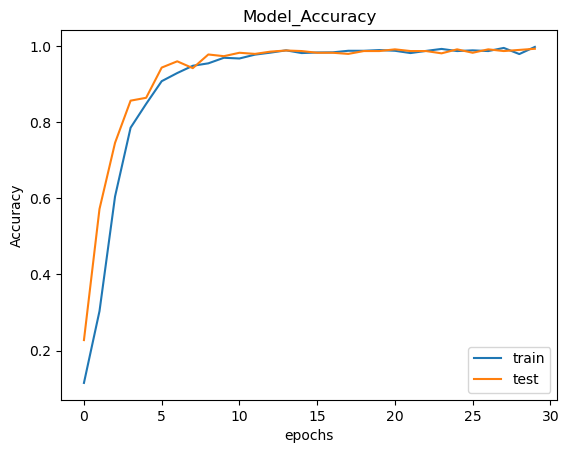

In [30]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

Summarize history for Loss

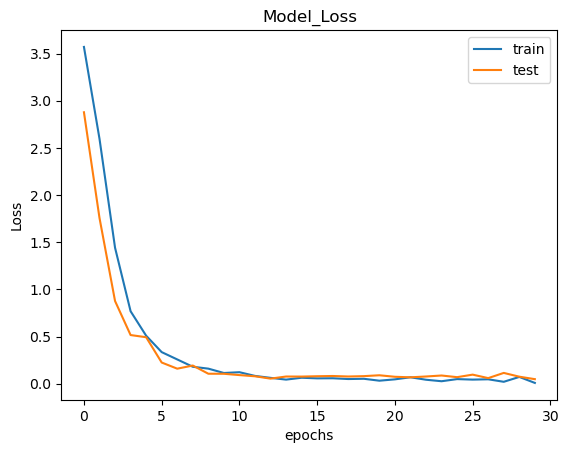

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model_Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 

In [33]:

import seaborn as sns

In [34]:
y_test.shape

(834,)

In [35]:
y_pred = model.predict(X_test).round()

27/27 [==============================] - 2s 48ms/step


In [36]:
y_pred = model.predict(X_test)

27/27 [==============================] - 1s 49ms/step


In [37]:
y_pred = [np.argmax(i) for i in y_pred]

In [38]:
accuracy_score(y_test,y_pred)

0.9892086330935251

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        55
           4       1.00      0.93      0.96        27
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        11
           7       0.93      1.00      0.97        28
           8       1.00      1.00      1.00         4
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00        24
          17       1.00      1.00      1.00        22
          19       0.00    

<Axes: >

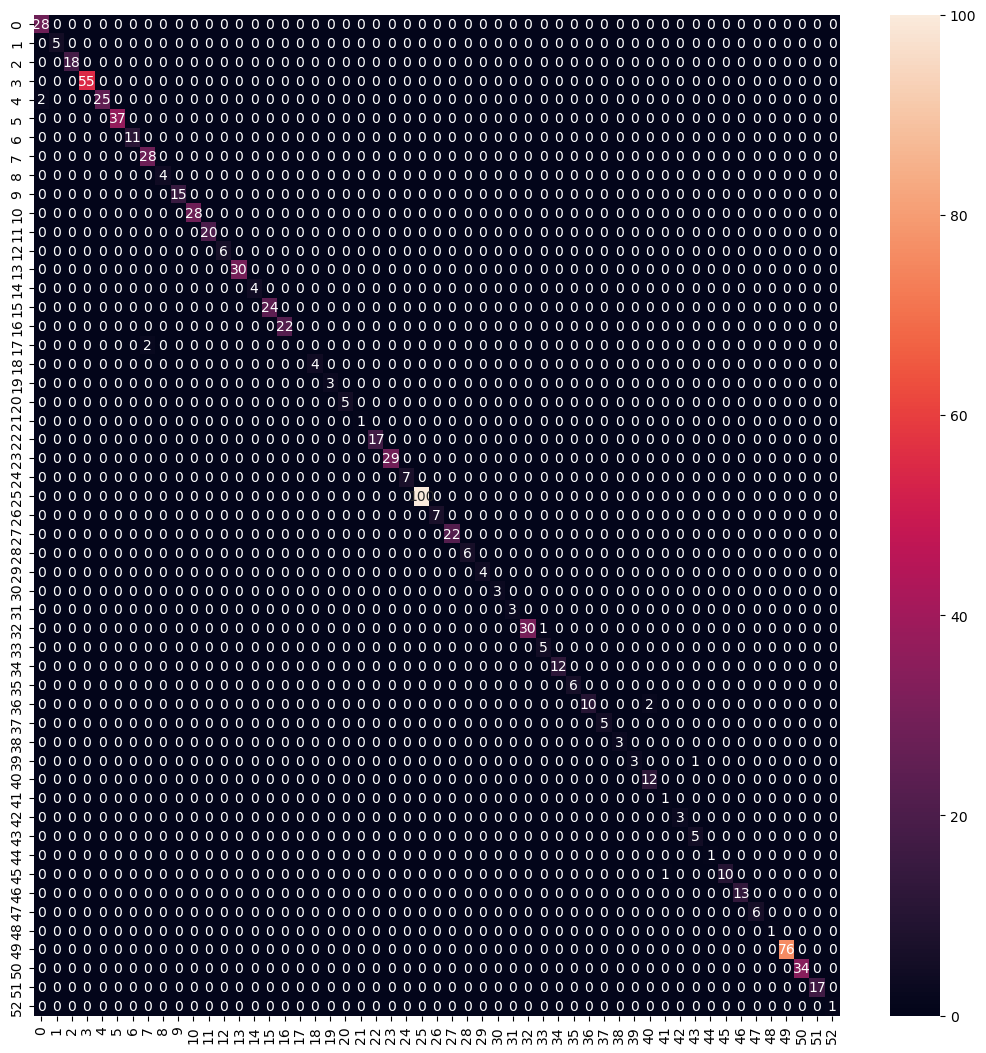

In [40]:
plt.figure(figsize = (13,13))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True,fmt = 'd')

In [41]:
model.save('traffic_classifier.h5')

In [44]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = label_names
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((43,43))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict([image])[0]
    pred = np.argmax(pred)
    sign = classes[pred]
    sign = df.loc[sign]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)


def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()




1/1 [==============================] - 0s 110ms/step
Name    Speed limit (5km/h)
Name: 0, dtype: object
1/1 [==============================] - 0s 24ms/step
Name    Speed limit (15km/h)
Name: 1, dtype: object
1/1 [==============================] - 0s 22ms/step
Name    Speed limit (40km/h)
Name: 3, dtype: object
1/1 [==============================] - 0s 24ms/step
Name    Unknown5
Name: 49, dtype: object
1/1 [==============================] - 0s 23ms/step
Name    Dont Go Left or Right
Name: 12, dtype: object
1/1 [==============================] - 0s 22ms/step
Name    Speed limit (30km/h)
Name: 2, dtype: object
1/1 [==============================] - 0s 28ms/step
Name    Dont overtake from Left
Name: 14, dtype: object
1/1 [==============================] - 0s 34ms/step
Name    Unknown8
Name: 57, dtype: object
1/1 [==============================] - 0s 25ms/step
Name    Under Construction
Name: 48, dtype: object
1/1 [==============================] - 0s 28ms/step
Name    Go Right
Name: 24, dt